In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

Now we move on to analyse the blitz dataset for highly ranked players.

In [2]:
chessdata = pd.read_csv('classicalMidRatingData.csv')
chessdata['Opening_new'].describe()


count                13216
unique                  89
top       Sicilian Defense
freq                  1838
Name: Opening_new, dtype: object

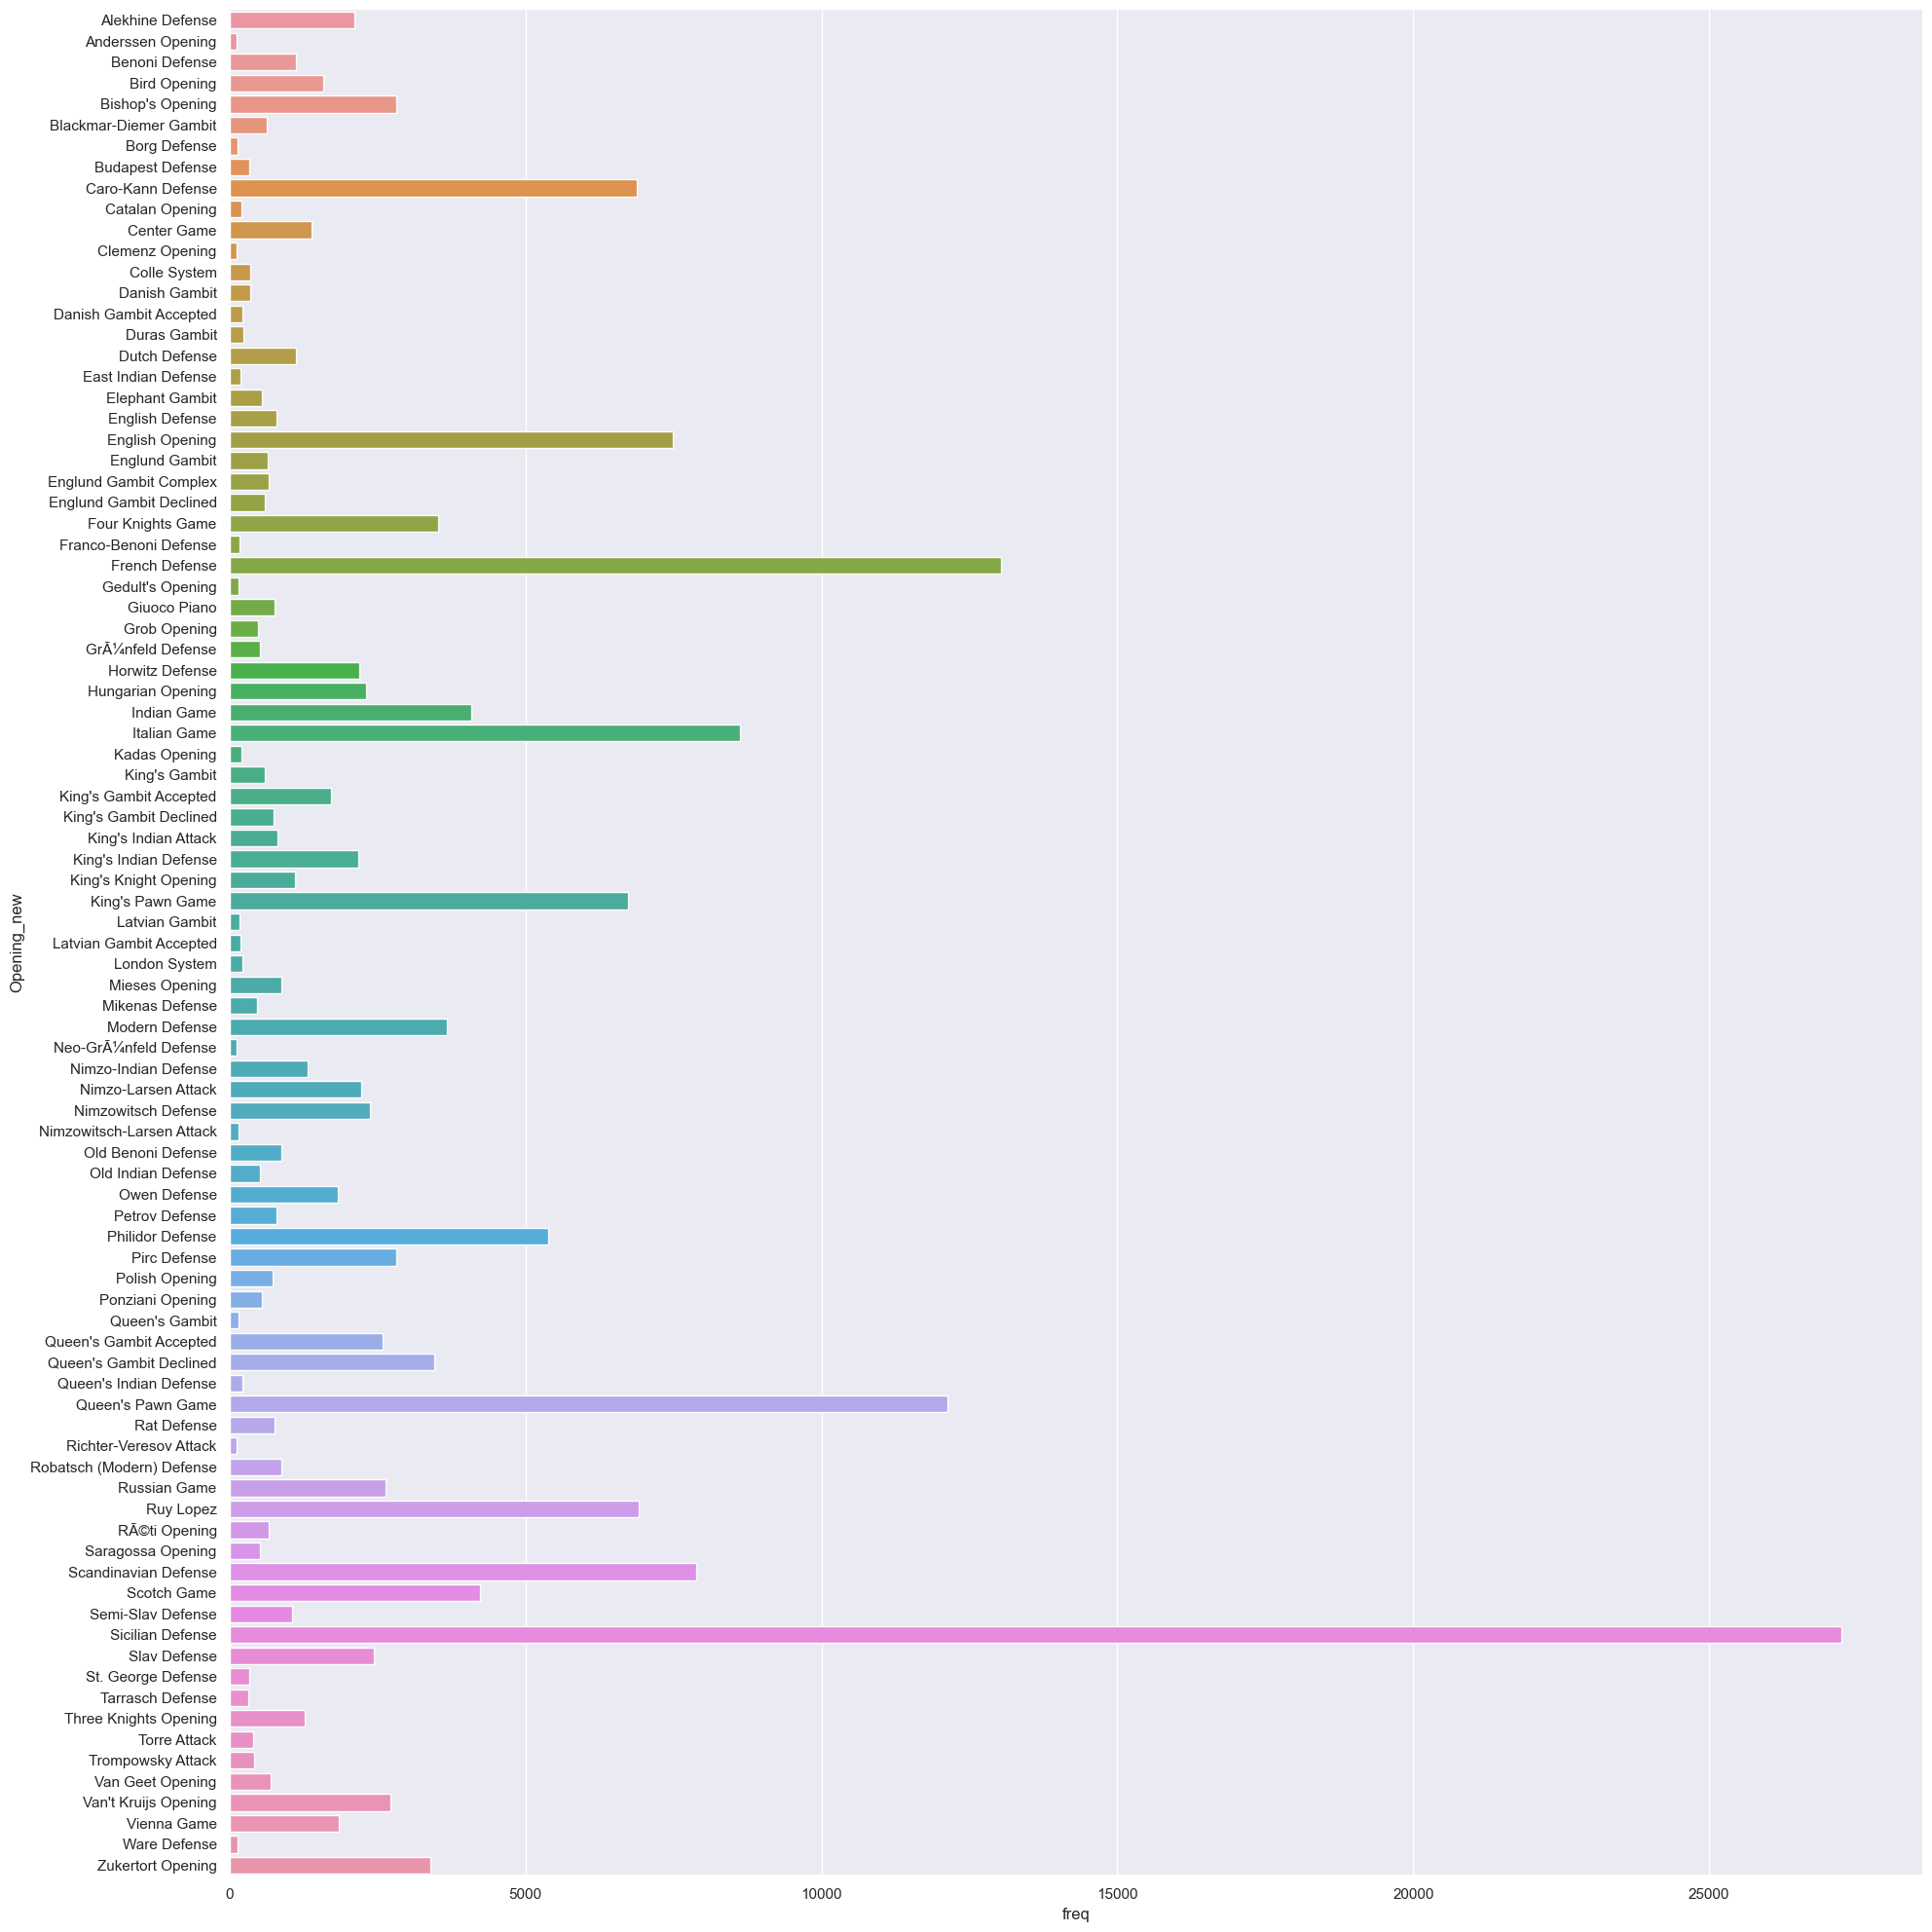

In [3]:
myorder=sorted(chessdata['Opening_new'].drop_duplicates())

sb.catplot(x= 'freq', y='Opening_new', data = chessdata, kind='bar',orient='h', height=20, aspect=1, order=myorder, errorbar=None)


In [4]:
freq_gen = chessdata
freq_gen['tot'] = freq_gen.groupby('Opening_new')['Opening_new'].transform('count')


# freq_gen['Opening_new'] = freq_gen['Opening_new'].drop_duplicates()
# freq_gen = freq_gen.dropna()
# frgeeq_n



In [5]:
temp = freq_gen[['Opening_new', 'Result', 'tot']]

#convert the fucking strings to integers
temp.loc[temp.Result == "0-1", 'Result'] = 0
temp.loc[temp.Result == "1-0", 'Result'] = 1
temp.loc[temp.Result == "1/2-1/2", 'Result'] = 0


temp['win'] = temp.groupby('Opening_new')['Result'].transform('sum')

temp['Opening_new'] = temp['Opening_new'].drop_duplicates()
temp = temp.dropna()

temp = temp.drop('Result', axis=1)
temp["win_rate"] = temp["win"].div(temp["tot"].values)

temp.sort_values(by=['win_rate'])


C:\Users\rinoa\AppData\Local\Temp\ipykernel_17248\2706443046.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['win'] = temp.groupby('Opening_new')['Result'].transform('sum')
C:\Users\rinoa\AppData\Local\Temp\ipykernel_17248\2706443046.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Opening_new'] = temp['Opening_new'].drop_duplicates()


,Opening_new,tot,win,win_rate
11832,Neo-GrÃ¼nfeld Defense,2,0,0.0
1052,Clemenz Opening,7,0,0.0
1390,Duras Gambit,11,2,0.181818
108,Kadas Opening,9,2,0.222222
653,Anderssen Opening,4,1,0.25
...,...,...,...,...
592,Elephant Gambit,34,23,0.676471
1369,Ware Defense,11,10,0.909091
1085,Queen's Gambit,8,8,1.0
2554,Catalan Opening,4,4,1.0


Win rate for white

In [6]:
temp = temp[temp['tot'] >100]
temp.sort_values(by=['win_rate'])

,Opening_new,tot,win,win_rate
72,Van't Kruijs Opening,160,55,0.34375
143,Hungarian Opening,114,41,0.359649
204,Nimzo-Larsen Attack,105,42,0.4
101,Center Game,125,51,0.408
121,Pirc Defense,178,76,0.426966
10,Sicilian Defense,1838,789,0.429271
73,Indian Game,258,111,0.430233
19,Bishop's Opening,205,91,0.443902
2,French Defense,786,357,0.454198
75,Caro-Kann Defense,366,167,0.456284


Immediately we see, white performs very well in the Philidor Defense, Vienna Game, Zukertort Opening, Modern Defense and Semi-Slav Defense. The former, we mentioned in the BlitzMid dataset. We will take a closer look at these in the classification tree.

In [7]:
temp1 = freq_gen[['Opening_new', 'Result', 'tot']]

#convert the fucking strings to integers
temp1.loc[temp1.Result == "0-1", 'Result'] = 1
temp1.loc[temp1.Result == "1-0", 'Result'] = 0
temp1.loc[temp1.Result == "1/2-1/2", 'Result'] = 0


temp1['win'] = temp1.groupby('Opening_new')['Result'].transform('sum')

temp1['Opening_new'] = temp1['Opening_new'].drop_duplicates()
temp1 = temp1.dropna()

temp1 = temp1.drop('Result', axis=1)
temp1["win_rate"] = temp1["win"].div(temp1["tot"].values)

temp1.sort_values(by=['win_rate'])

C:\Users\rinoa\AppData\Local\Temp\ipykernel_17248\3596201361.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['win'] = temp1.groupby('Opening_new')['Result'].transform('sum')
C:\Users\rinoa\AppData\Local\Temp\ipykernel_17248\3596201361.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['Opening_new'] = temp1['Opening_new'].drop_duplicates()


,Opening_new,tot,win,win_rate
1085,Queen's Gambit,8,0,0.0
668,Borg Defense,6,0,0.0
2554,Catalan Opening,4,0,0.0
1369,Ware Defense,11,1,0.090909
592,Elephant Gambit,34,9,0.264706
...,...,...,...,...
653,Anderssen Opening,4,3,0.75
108,Kadas Opening,9,7,0.777778
1390,Duras Gambit,11,9,0.818182
1052,Clemenz Opening,7,7,1.0


Winrate for Black

In [8]:

temp1 = temp1[temp1['tot'] >100]
temp1.sort_values(by=['win_rate'])

,Opening_new,tot,win,win_rate
39,Queen's Gambit Accepted,188,61,0.324468
1,Philidor Defense,452,173,0.382743
43,Scotch Game,343,135,0.393586
22,Zukertort Opening,138,55,0.398551
113,King's Knight Opening,130,52,0.4
45,Nimzowitsch Defense,162,67,0.41358
21,Queen's Gambit Declined,458,194,0.423581
37,Ruy Lopez,679,289,0.425626
6,English Opening,511,219,0.428571
29,Scandinavian Defense,459,203,0.442266


Black does extremely well in the Van't Kruijs Opening, more than 5% points higher than the next best. We explained why in BlitzMid, and it is no suprise to see that a suboptimal first move suffers in the more competitive format.

In [9]:
# Import the encoder from sklearn
chessdata.loc[chessdata.Result == "0-1", 'Result'] = "-1" #black win
chessdata.loc[chessdata.Result == "1-0", 'Result'] = "1" #white win
chessdata.loc[chessdata.Result == "1/2-1/2", 'Result'] = "0" #draw
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
cat_predictors = chessdata[["Opening_new"]]

In [10]:
ohe.fit(cat_predictors)
predictors_cat_ohe = pd.DataFrame(ohe.transform(cat_predictors).toarray(), 
                                  columns=ohe.get_feature_names_out(cat_predictors.columns))

In [11]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [12]:
chessdata.info()
chessData_num = chessdata[['ELO Diff']]
chessData_res = chessdata['Result']
chessData_ohe = pd.concat([chessData_num, predictors_cat_ohe, chessData_res], 
                           sort = False, axis = 1).reindex(index=chessData_num.index)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13216 entries, 0 to 13215
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    13216 non-null  int64  
 1   BlackElo      13216 non-null  int64  
 2   ECO           13216 non-null  object 
 3   Event         13216 non-null  object 
 4   Opening       13216 non-null  object 
 5   Result        13216 non-null  object 
 6   Termination   13216 non-null  object 
 7   TimeControl   13216 non-null  object 
 8   WhiteElo      13216 non-null  int64  
 9   BlackTitle    3 non-null      object 
 10  WhiteTitle    2 non-null      object 
 11  Move_ply_200  10 non-null     object 
 12  Category      13216 non-null  object 
 13  Opening_new   13216 non-null  object 
 14  freq          13216 non-null  int64  
 15  ELO Diff      13216 non-null  int64  
 16  Ave ELO       13216 non-null  float64
 17  tot           13216 non-null  int64  
dtypes: float64(1), int64(6), o

In [13]:


# Extract Response and Predictors
y = pd.DataFrame(chessData_ohe['Result'])
X = pd.DataFrame(chessData_ohe.drop('Result', axis = 1))


# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 6) 
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree


DecisionTreeClassifier(max_depth=6)

[Text(0.4607712765957447, 0.9285714285714286, 'ELO Diff <= 10.5\ngini = 0.527\nsamples = 9251\nvalue = [4401, 267, 4583]\nclass = White'),
 Text(0.17819148936170212, 0.7857142857142857, 'ELO Diff <= -127.5\ngini = 0.523\nsamples = 5559\nvalue = [2899, 148, 2512]\nclass = Black'),
 Text(0.0797872340425532, 0.6428571428571429, 'Opening_new_Nimzo-Indian Defense <= 0.5\ngini = 0.466\nsamples = 593\nvalue = [391, 16, 186]\nclass = Black'),
 Text(0.06914893617021277, 0.5, 'ELO Diff <= -129.5\ngini = 0.464\nsamples = 590\nvalue = [391, 16, 183]\nclass = Black'),
 Text(0.0425531914893617, 0.35714285714285715, 'ELO Diff <= -516.5\ngini = 0.47\nsamples = 573\nvalue = [375, 16, 182]\nclass = Black'),
 Text(0.02127659574468085, 0.21428571428571427, "Opening_new_King's Indian Attack <= 0.5\ngini = 0.269\nsamples = 26\nvalue = [22, 1, 3]\nclass = Black"),
 Text(0.010638297872340425, 0.07142857142857142, 'gini = 0.211\nsamples = 25\nvalue = [22, 0, 3]\nclass = Black'),
 Text(0.031914893617021274, 0.0

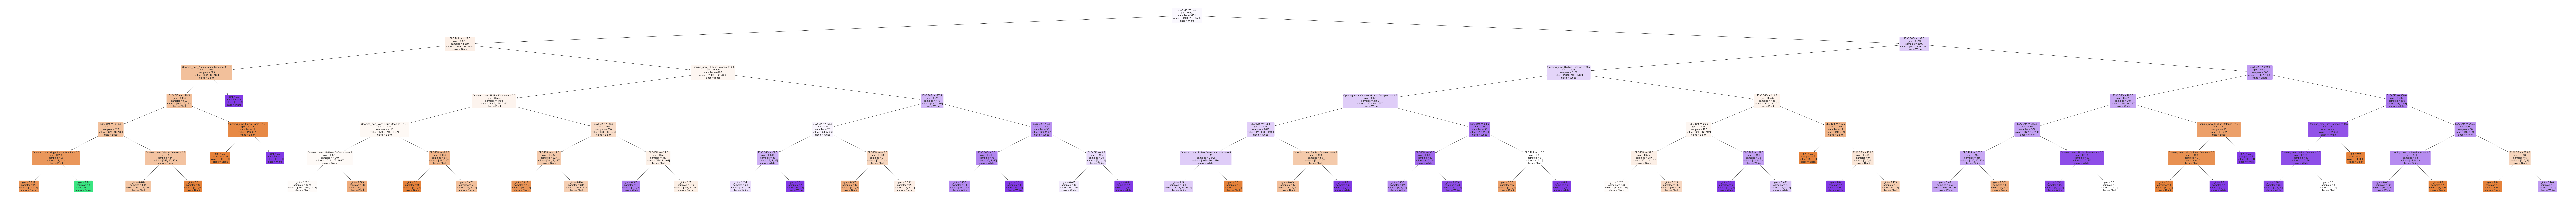

In [14]:
f = plt.figure(figsize=(256,20))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Black","Draw","White"])